# Membaca dataset suara
Kode di atas berfungsi untuk melakukan analisis eksploratif data (Exploratory Data Analysis / EDA) pada dataset bernama bukatutup.csv. Proses diawali dengan mengimpor tiga pustaka utama, yaitu pandas untuk membaca dan mengelola data dalam bentuk tabel (DataFrame), matplotlib.pyplot untuk membuat grafik, dan seaborn untuk mempercantik visualisasi data. Setelah itu, file CSV dibaca menggunakan pd.read_csv("bukatutup.csv"), yang menyimpan seluruh isi dataset ke dalam variabel df. Langkah selanjutnya adalah menampilkan informasi dasar dataset dengan perintah df.info() untuk melihat jumlah kolom, tipe data, serta banyaknya nilai yang tidak kosong, kemudian menampilkan lima baris pertama data menggunakan df.head(). Kode juga menampilkan statistik deskriptif seperti nilai rata-rata, standar deviasi, minimum, maksimum, dan kuartil menggunakan df.describe(). Selain itu, perulangan for col in df.columns: digunakan untuk menghitung jumlah nilai unik di setiap kolom, yang berguna untuk mengenali variabel numerik dan kategorikal.

Tahap berikutnya adalah memeriksa missing values dengan df.isnull().sum() untuk memastikan tidak ada data yang hilang. Jika dataset memiliki kolom numerik, maka kode akan membuat histogram dengan df[numeric_cols].hist() guna menunjukkan distribusi nilai tiap fitur numerik sehingga pola penyebaran data dapat diamati. Kemudian, hubungan antar fitur numerik dianalisis menggunakan matriks korelasi, yang divisualisasikan dengan sns.heatmap() agar terlihat seberapa kuat hubungan antar variabel (positif, negatif, atau tidak berkorelasi). Pada bagian akhir, kode memeriksa apakah dataset memiliki kolom target seperti label, kelas, atau status. Jika salah satu kolom tersebut ada, maka dibuat grafik batang menggunakan sns.countplot() untuk menampilkan jumlah data pada masing-masing kategori, misalnya kelas “Buka” dan “Tutup”. Namun, jika kolom target tidak ditemukan, program akan menampilkan pesan peringatan. Secara keseluruhan, kode ini digunakan untuk memahami struktur, isi, dan karakteristik awal dataset sebelum masuk ke tahap pemrosesan lanjutan atau pelatihan model machine learning.

In [ ]:
# ==========================
# 1. Import Library
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 2. Membaca Dataset
# ==========================
# Ganti path sesuai lokasi file kamu
df = pd.read_csv("bukatutup.csv")

# ==========================
# 3. Informasi Dasar Dataset
# ==========================
print("===== INFO DATA =====")
print(df.info())

print("\n===== 5 DATA TERATAS =====")
print(df.head())

print("\n===== DESKRIPSI STATISTIK =====")
print(df.describe())

print("\n===== NILAI UNIK PER KOLOM =====")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")

# ==========================
# 4. Mengecek Missing Values
# ==========================
print("\n===== CEK MISSING VALUES =====")
print(df.isnull().sum())

# ==========================
# 5. Distribusi Data (Numerik)
# ==========================
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

if len(numeric_cols) > 0:
    df[numeric_cols].hist(bins=15, figsize=(15, 10))
    plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
    plt.show()

# ==========================
# 6. Korelasi Antar Fitur
# ==========================
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriks Korelasi Fitur Numerik")
    plt.show()

# ==========================
# 7. Distribusi Kategori Target
# ==========================
if 'label' in df.columns or 'kelas' in df.columns or 'status' in df.columns:
    target_col = 'label' if 'label' in df.columns else ('kelas' if 'kelas' in df.columns else 'status')
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=target_col, palette="pastel")
    plt.title(f"Distribusi Kelas pada Kolom {target_col}")
    plt.show()
else:
    print("\nTidak ditemukan kolom target seperti 'label', 'kelas', atau 'status'.")

# Ekstraksi Fitur Audio untuk Identifikasi Suara

Kode di atas berfungsi untuk mengekstraksi fitur-fitur penting dari sinyal audio menggunakan pustaka librosa dan numpy. Proses dimulai dengan memuat file audio dalam bentuk waveform (y) dan sampling rate (sr). Kemudian, dilakukan perhitungan berbagai fitur statistik seperti Zero Crossing Rate (ZCR) yang menunjukkan seberapa sering sinyal melintasi sumbu nol, serta Root Mean Square Energy (RMS) untuk mengukur energi rata-rata sinyal. Selain itu, beberapa fitur spektral seperti Spectral Centroid, Spectral Bandwidth, dan Spectral Rolloff digunakan untuk menggambarkan karakteristik frekuensi dan distribusi energi dalam spektrum audio.

Tahap berikutnya melibatkan ekstraksi Mel-Frequency Cepstral Coefficients (MFCC) sebanyak 13 koefisien, yang merupakan representasi umum dari ciri khas suara manusia dan sering digunakan dalam sistem pengenalan suara atau musik. Nilai rata-rata dan standar deviasi dari setiap fitur dihitung, lalu digabungkan menjadi satu vektor fitur numerik yang siap digunakan sebagai input untuk model pembelajaran mesin. Dengan pendekatan ini, setiap file audio dapat diubah menjadi representasi numerik yang merepresentasikan identitas suara secara konsisten dan akurat.

In [ ]:
import numpy as np
import librosa

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)

        # Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y)
        zcr_mean = np.mean(zcr)
        zcr_std = np.std(zcr)

        # RMS Energy
        rms = librosa.feature.rms(y=y)
        rmse_mean = np.mean(rms)
        rmse_std = np.std(rms)

        # Spectral features
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

        centroid_mean, centroid_std = np.mean(centroid), np.std(centroid)
        bandwidth_mean, bandwidth_std = np.mean(bandwidth), np.std(bandwidth)
        rolloff_mean, rolloff_std = np.mean(rolloff), np.std(rolloff)

        # MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_means = [np.mean(mfcc[i]) for i in range(13)]
        mfcc_stds = [np.std(mfcc[i]) for i in range(13)]

        # Gabungkan semua fitur
        features = [
            zcr_mean, zcr_std,
            rmse_mean, rmse_std,
            centroid_mean, centroid_std,
            bandwidth_mean, bandwidth_std,
            rolloff_mean, rolloff_std
        ]

        for mean, std in zip(mfcc_means, mfcc_stds):
            features.extend([mean, std])

        return np.array(features).reshape(1, -1)

    except Exception as e:
        print(f"❌ Error ekstraksi fitur: {e}")
        return None


# Prediksi Suara Menggunakan Model Pembelajaran Mesin

Kode di atas digunakan untuk melakukan prediksi identitas suara berdasarkan fitur audio yang telah diekstraksi sebelumnya. Fungsi predict_voice() memuat dua objek penting, yaitu model klasifikasi (classifier.pkl) dan label encoder (label_encoder.pkl) yang sebelumnya disimpan setelah proses pelatihan. Model yang dimuat kemudian digunakan untuk melakukan prediksi terhadap data fitur (features) yang diberikan, menghasilkan kelas suara yang paling mungkin serta tingkat keyakinan dari hasil prediksi tersebut.

Setelah prediksi dilakukan, hasilnya diterjemahkan kembali ke bentuk nama kelas asli menggunakan label_encoder.inverse_transform(). Fungsi ini memastikan bahwa output bukan hanya berupa label numerik, melainkan nama orang atau kategori suara yang dikenali. Nilai confidence dihitung dari probabilitas tertinggi hasil prediksi dan dikonversi menjadi persentase. Dengan demikian, fungsi ini menjadi inti dari proses identifikasi suara, mengubah data numerik hasil ekstraksi fitur menjadi keputusan cerdas berbasis model pembelajaran mesin.

In [ ]:
import joblib
import numpy as np

def predict_voice(features):
    try:
        # Muat model dan label encoder
        model = joblib.load("models/classifier.pkl")
        label_encoder = joblib.load("models/label_encoder.pkl")

        # Prediksi
        pred = model.predict(features)
        prob = model.predict_proba(features)
        class_name = label_encoder.inverse_transform(pred)[0]
        confidence = np.max(prob) * 100

        return class_name, confidence
    except Exception as e:
        print("❌ Error prediksi:", e)
        return None, 0


# Pelatihan Model Identifikasi Suara Menggunakan Random Forest

Kode di atas digunakan untuk melatih model pembelajaran mesin yang mampu mengenali suara dari data yang telah diekstraksi menjadi fitur numerik. Dataset yang digunakan bernama bukatutup.csv, yang berisi sejumlah file audio beserta label kelasnya (misalnya, “buka” dan “tutup”). Langkah pertama adalah memisahkan fitur (X) dari label (y), kemudian label diubah menjadi bentuk numerik menggunakan LabelEncoder agar dapat diproses oleh algoritma machine learning. Setelah itu, data dibagi menjadi dua bagian — 80% untuk pelatihan dan 20% untuk pengujian — menggunakan train_test_split untuk memastikan model dapat dievaluasi secara obyektif.
Model yang digunakan adalah Random Forest Classifier dengan 150 pohon keputusan (n_estimators=150), yang terkenal stabil dan efektif untuk berbagai jenis data. Setelah pelatihan selesai, kinerja model dievaluasi menggunakan akurasi dan classification report yang menampilkan metrik seperti precision, recall, dan F1-score untuk setiap kelas. Jika hasilnya memuaskan, model dan label encoder disimpan ke folder models/ menggunakan joblib. File ini kemudian dapat digunakan kembali oleh aplikasi Streamlit untuk melakukan identifikasi suara secara real-time tanpa perlu melatih ulang model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib
import os

# Load dataset
data_path = "data/bukatutup.csv"
df = pd.read_csv(data_path)

# Pisahkan fitur dan label
X = df.drop(columns=["file_name", "class"])
y = df["class"]

# Encode label jadi angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Buat model
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f" Akurasi model: {acc:.2f}")
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Simpan model dan label encoder
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/classifier.pkl")
joblib.dump(le, "models/label_encoder.pkl")
print(" Model dan label encoder berhasil disimpan di folder 'models/'.")


# Aplikasi Pengenalan Suara Otomatis

Kode di atas merupakan implementasi antarmuka pengguna berbasis Streamlit untuk aplikasi identifikasi suara otomatis. Aplikasi ini memungkinkan pengguna untuk mengunggah file audio berformat .wav, yang kemudian akan dianalisis menggunakan model pembelajaran mesin (machine learning) yang telah dilatih sebelumnya. Melalui fungsi extract_features(), sistem mengekstraksi berbagai ciri akustik seperti MFCC, spectral centroid, bandwidth, dan energi RMS dari sinyal suara. Fitur-fitur ini menjadi representasi numerik dari karakteristik unik setiap suara, yang kemudian digunakan untuk memprediksi identitas atau kategori suara menggunakan fungsi predict_voice().

Selain fungsionalitas utama, kode ini juga menampilkan antarmuka dengan tema gelap (dark mode) agar tampilan lebih elegan dan modern. Warna utama yang digunakan adalah hitam dengan aksen cyan (#00ffcc) untuk memberikan kontras dan kenyamanan visual. Tombol interaktif, area unggahan file, serta pesan notifikasi (informasi, sukses, dan error) telah disesuaikan agar serasi dengan tema tersebut. Dengan desain ini, aplikasi tidak hanya berfungsi sebagai alat identifikasi suara, tetapi juga memberikan pengalaman pengguna (UX) yang lebih profesional dan menarik.

In [ ]:
import streamlit as st
import os
from utils.preprocess import extract_features
from utils.predict import predict_voice

st.set_page_config(page_title="Voice Identification App", page_icon="🎤")

# === CSS CUSTOM ===
st.markdown("""
    <style>
        /* Background utama dan warna teks */
        .stApp {
            background-color: #000000;
            color: white;
        }

        /* Hilangkan background abu-abu di uploader */
        [data-testid="stFileUploaderDropzone"] {
            background-color: #000000 !important;
            border: 2px dashed #444 !important;
        }

        /* Warna teks dan ikon di uploader */
        [data-testid="stFileUploaderDropzone"] * {
            color: white !important;
        }

        /* Warna heading */
        h1, h2, h3, h4, h5 {
            color: #00ffcc !important;
        }

        /* Tombol custom */
        .stButton>button {
            background-color: #00ffcc;
            color: #000;
            border-radius: 8px;
            font-weight: bold;
            transition: 0.3s;
            border: none;
        }

        .stButton>button:hover {
            background-color: #00ffaa;
            color: black;
            transform: scale(1.05);
        }

        /* Pesan info, success, error agar cocok dengan tema hitam */
        .stAlert {
            background-color: #111 !important;
            color: white !important;
            border-left: 5px solid #00ffcc !important;
        }
    </style>
""", unsafe_allow_html=True)

# === UI Aplikasi ===
st.title("🎤 Voice Identification App")
st.write("Unggah file audio (format `.wav`) untuk dikenali suaranya.")

uploaded_file = st.file_uploader("Pilih file audio (.wav)", type=["wav"])

if uploaded_file is not None:
    with open("temp.wav", "wb") as f:
        f.write(uploaded_file.getbuffer())

    st.audio(uploaded_file, format="audio/wav")

    if st.button("🔍 Identifikasi Suara"):
        with st.spinner("Sedang memproses..."):
            features = extract_features("temp.wav")
            if features is not None:
                pred_class, confidence = predict_voice(features)
                if pred_class:
                    st.success(f"**Hasil Prediksi:** {pred_class}")
                    st.info(f"Kepercayaan: {confidence:.2f}%")
                else:
                    st.error("Gagal melakukan prediksi.")
            else:
                st.error("Gagal mengekstraksi fitur dari audio.")
else:
    st.info("Silakan unggah file audio terlebih dahulu.")


# Tampilan UI

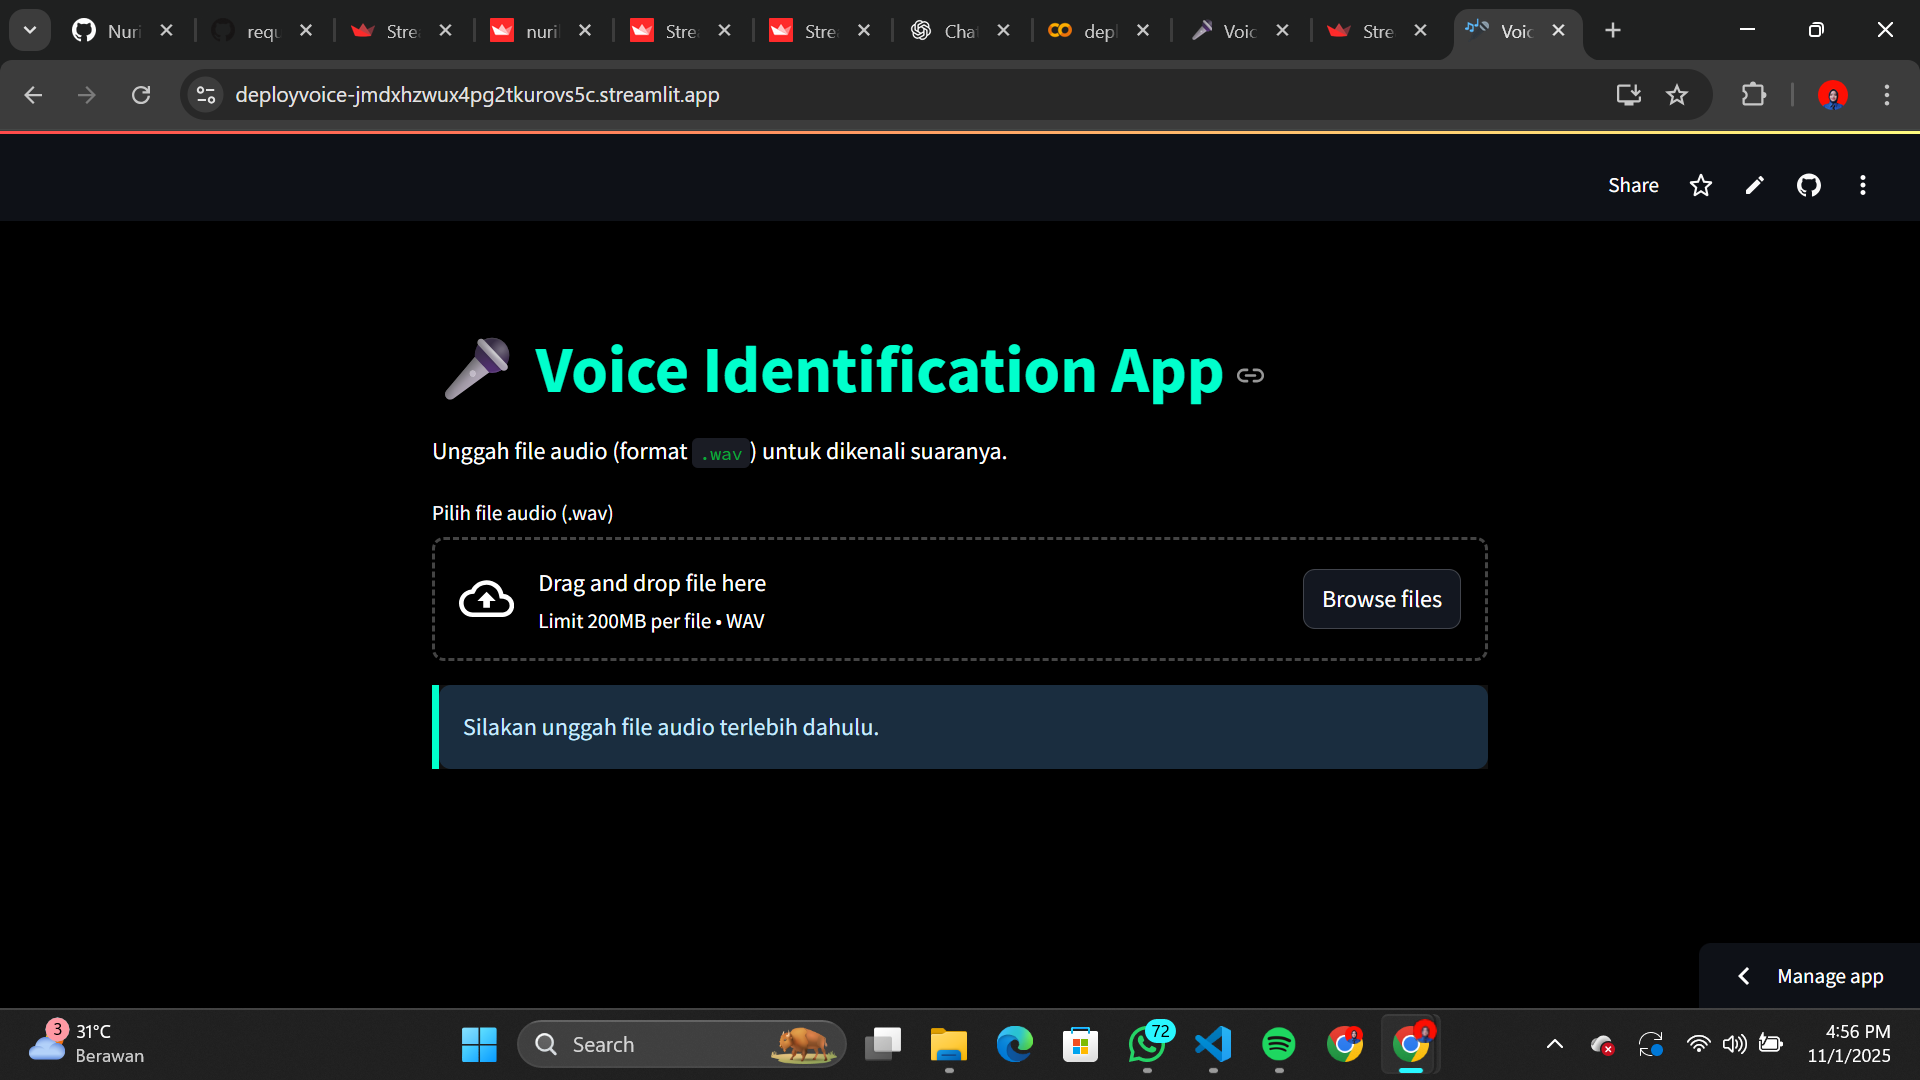

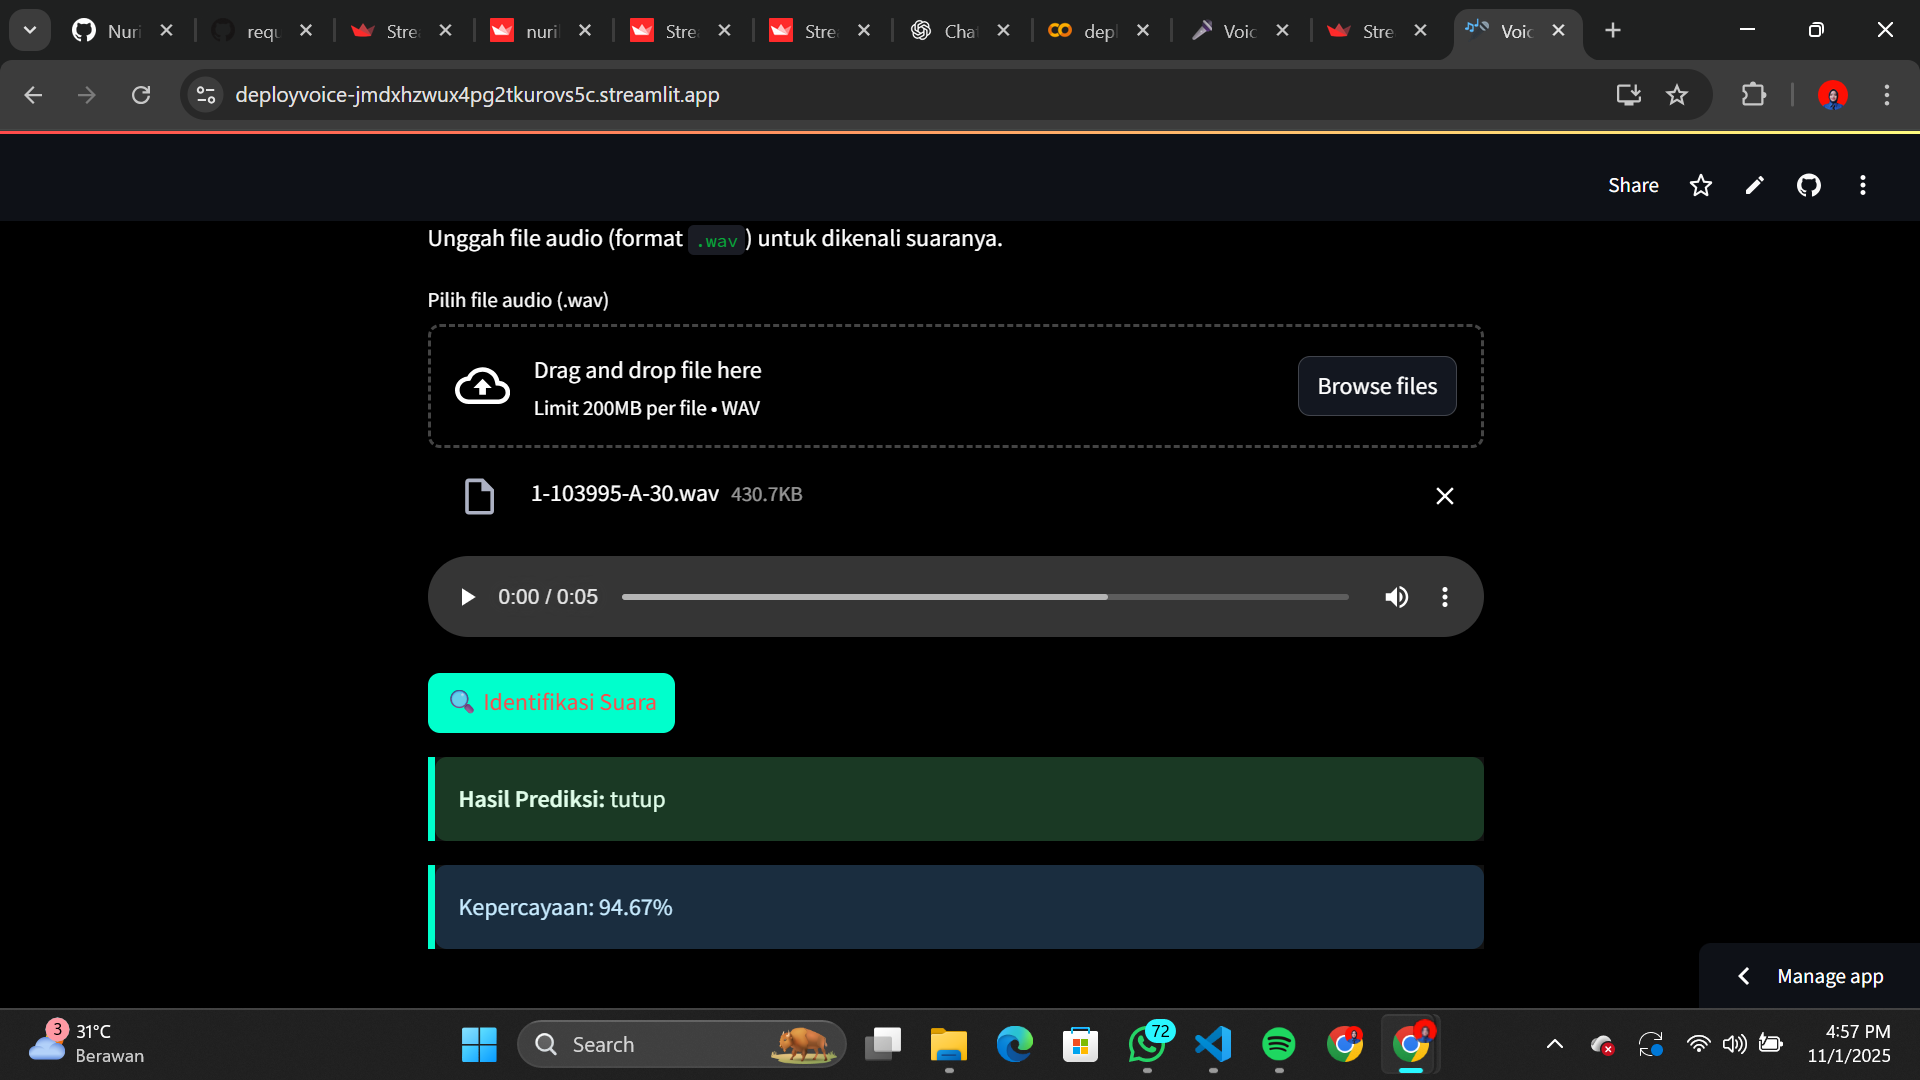

# Link Streamlit
https://deployvoice-jmdxhzwux4pg2tkurovs5c.streamlit.app/